In [1]:
import os
import sys
sys.path.append('utils')
from dataset.spot import TOTAL_STD, TOTAL_MEAN, SPOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import types

%matplotlib inline

In [2]:
target = SPOT["2016":"2016-06-30"].values

In [3]:
path = './bounds/'

In [4]:
method = ['arima_', 'bootstrap_', 'gpr_', 'nn-lube_', 'rnn-lube_', 'drnn-lube_']
u = '95'

In [5]:
arima = np.load(path + method[0] + u + '.npy')
bootstrap = np.load(path + method[1] + u + '.npy')
gpr = np.load(path + method[2] + u + '.npy')
nn_lube = np.load(path + method[3] + u + '.npy')
rnn_lube = np.load(path + method[4] + u + '.npy')
drnn_lube = np.load(path + method[5] + u + '.npy')

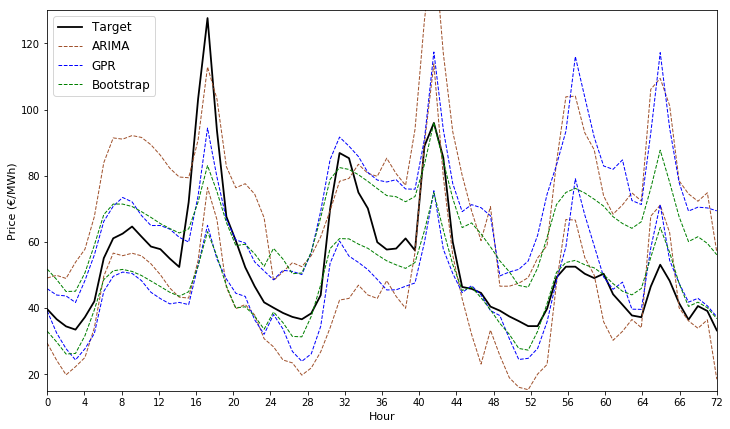

In [9]:
i = 19*24
w = 72
x=np.linspace(0, w, w)
plt.figure(figsize=(12,7))
plt.plot(x, target[i:i+w], color='black', linestyle='-', linewidth=1.8, label='Target')
plt.plot(x, arima[0][i:i+w], color='sienna',linestyle='--', linewidth=1, label='ARIMA')
plt.plot(x, arima[1][i:i+w], color='sienna', linestyle='--', linewidth=1)
plt.plot(x, gpr[0][i:i+w], color='blue', linestyle='--', linewidth=1, label='GPR')
plt.plot(x, gpr[1][i:i+w], color='blue', linestyle='--', linewidth=1)
plt.plot(x, bootstrap[0][i:i+w], color='green', linestyle='--', linewidth=1, label='Bootstrap')
plt.plot(x, bootstrap[1][i:i+w], color='green', linestyle='--', linewidth=1)

plt.xticks(np.array(range(0, 73, 4)), ['0','4','8','12','16','20','24','28','32','36','40','44','48','52','56','60','64','66','72'])
plt.xlim(0, w)
plt.ylim(15, 130)
plt.legend(fontsize=12, ncol=1, loc=2) # 显示图例

plt.xlabel('Hour',fontsize=11)
plt.ylabel('Price (€/MWh)',fontsize=11)

# plt.savefig('./figures/spike_pi_'+ u + '_1.jpg',bbox_inches='tight', )

plt.show()

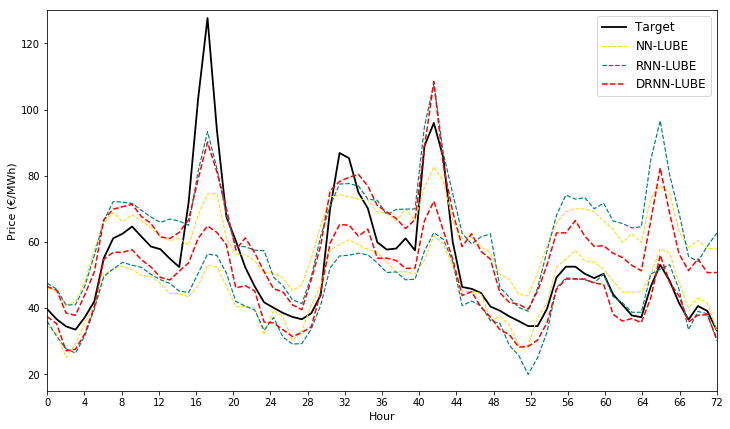

In [10]:
i = 19*24
w = 72
x=np.linspace(0, w, w)
plt.figure(figsize=(12,7))
plt.plot(x, target[i:i+w], color='black', linestyle='-', linewidth=1.8, label='Target')
plt.plot(x, nn_lube[0][i:i+w], color='gold', linestyle='--', linewidth=1, label='NN-LUBE')
plt.plot(x, nn_lube[1][i:i+w], color='gold', linestyle='--', linewidth=1)
plt.plot(x, rnn_lube[0][i:i+w], color='teal', linestyle='--', linewidth=1.2, label='RNN-LUBE')
plt.plot(x, rnn_lube[1][i:i+w], color='teal', linestyle='--', linewidth=1.2)
plt.plot(x, drnn_lube[0][i:i+w], color='red', linestyle='--', linewidth=1.5, label='DRNN-LUBE')
plt.plot(x, drnn_lube[1][i:i+w], color='red', linestyle='--', linewidth=1.5)

plt.xticks(np.array(range(0, 73, 4)), ['0','4','8','12','16','20','24','28','32','36','40','44','48','52','56','60','64','66','72'])
plt.xlim(0, w)
plt.ylim(15, 130)
plt.legend(fontsize=12, ncol=1, loc=1) # 显示图例

plt.xlabel('Hour',fontsize=11)
plt.ylabel('Price (€/MWh)',fontsize=11)

# plt.savefig('./figures/spike_pi_'+ u + '_2.jpg',bbox_inches='tight', )

plt.show()

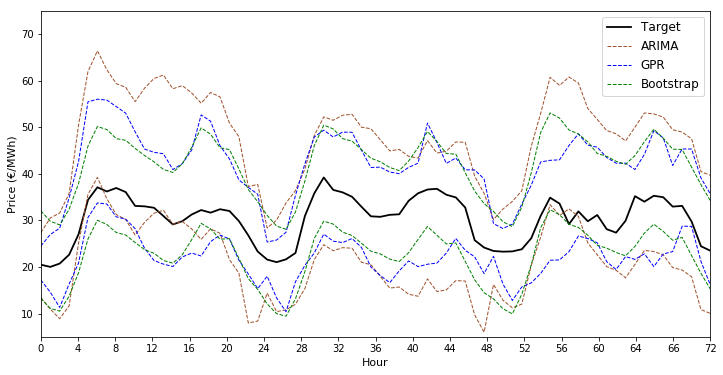

In [11]:
i = (2+20*7+2)*24
w = 3*24
x=np.linspace(0, w, w)
plt.figure(figsize=(12,6))
plt.plot(x, target[i:i+w], color='black', linestyle='-', linewidth=1.8, label='Target')
plt.plot(x, arima[0][i:i+w], color='sienna',linestyle='--', linewidth=1, label='ARIMA')
plt.plot(x, arima[1][i:i+w], color='sienna', linestyle='--', linewidth=1)
plt.plot(x, gpr[0][i:i+w], color='blue', linestyle='--', linewidth=1, label='GPR')
plt.plot(x, gpr[1][i:i+w], color='blue', linestyle='--', linewidth=1)
plt.plot(x, bootstrap[0][i:i+w], color='green', linestyle='--', linewidth=1, label='Bootstrap')
plt.plot(x, bootstrap[1][i:i+w], color='green', linestyle='--', linewidth=1)

plt.xticks(np.array(range(0, 73, 4)), ['0','4','8','12','16','20','24','28','32','36','40','44','48','52','56','60','64','66','72'])
plt.xlim(0, w)
plt.ylim(5, 75)
plt.xlabel('Hour',fontsize=11)
plt.ylabel('Price (€/MWh)',fontsize=11)
plt.legend(fontsize=12, ncol=1, loc=1) # 显示图例
plt.savefig('./figures/stable_pi_'+ u + '_1.jpg',bbox_inches='tight', )

plt.show()

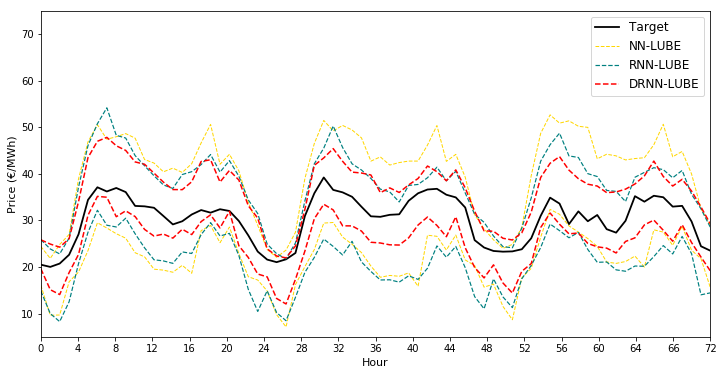

In [12]:
i = (2+20*7+2)*24
w = 3*24
x=np.linspace(0, w, w)
plt.figure(figsize=(12,6))
plt.plot(x, target[i:i+w], color='black', linestyle='-', linewidth=1.8, label='Target')
plt.plot(x, nn_lube[0][i:i+w], color='gold', linestyle='--', linewidth=1, label='NN-LUBE')
plt.plot(x, nn_lube[1][i:i+w], color='gold', linestyle='--', linewidth=1)
plt.plot(x, rnn_lube[0][i:i+w], color='teal', linestyle='--', linewidth=1.2, label='RNN-LUBE')
plt.plot(x, rnn_lube[1][i:i+w], color='teal', linestyle='--', linewidth=1.2)
plt.plot(x, drnn_lube[0][i:i+w], color='red', linestyle='--', linewidth=1.5, label='DRNN-LUBE')
plt.plot(x, drnn_lube[1][i:i+w], color='red', linestyle='--', linewidth=1.5)

plt.xticks(np.array(range(0, 73, 4)), ['0','4','8','12','16','20','24','28','32','36','40','44','48','52','56','60','64','66','72'])
plt.xlim(0, w)
plt.ylim(5, 75)
plt.xlabel('Hour',fontsize=11)
plt.ylabel('Price (€/MWh)',fontsize=11)
plt.legend(fontsize=12, ncol=1, loc=1) # 显示图例
plt.savefig('./figures/stable_pi_'+ u + '_2.jpg',bbox_inches='tight', )

plt.show()

In [74]:
w1 = rnn_lube[1]-rnn_lube[0]
w2 = drnn_lube[1]-drnn_lube[0]

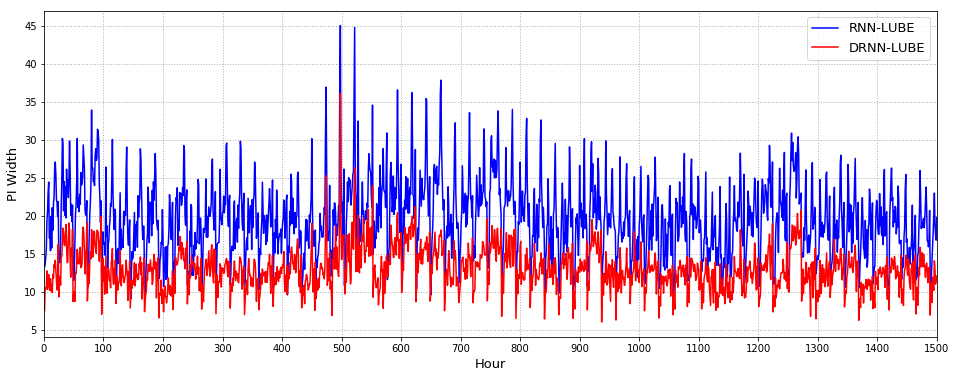

In [155]:
x=np.linspace(1, 1500, 1500)
plt.figure(figsize=(16,6))
plt.plot(x, w1[:1500], color='blue', label='RNN-LUBE')
plt.plot(x, w2[:1500], color='red', label='DRNN-LUBE')

plt.xlim(0,1500)
plt.xticks(np.array(range(0, 1501, 100)))
plt.legend(fontsize=13) # 显示图例

plt.xlabel('Hour',fontsize=13)
plt.ylabel('PI Width',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
plt.savefig('./figures/pi'+u+'_width.jpg',bbox_inches='tight', )

plt.show()